# Table of Contents

Introduction 

part 1 - probability 

part 2 -A/B test

part 3 - Regression 

# Introduction

A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these

For this project, you will be working to understand the results of an A/B test run by an e-commerce website. My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision

# Probability 

In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import norm
import random
import matplotlib.pyplot as plt 
%matplotlib inline 
import scipy.stats as stats

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
df = pd.read_csv(r"C:\Users\Dnaaya\Downloads\Analyze_AB_Test_Results-master\Analyze_AB_Test_Results-master\ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


 Use the below cell to find the number of rows in the dataset.


In [3]:
df.shape[0]

294478

# The number of unique users in the dataset.



In [4]:
df['user_id'].nunique()

290584

# The proportion of users converted.



In [5]:
df['converted'].mean()

0.11965919355605512

# The number of times the new_page and treatment don't line up.



In [6]:
df2 = df.query("(group == 'control' and landing_page == 'new_page') or (group == 'treatment' and landing_page == 'old_page')") 
df2.shape[0]

3893

# Do any of the rows have missing values?



In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

The rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page. Use Quiz 2 in the classroom to provide how we should handle these rows.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz. Store your new dataframe in df2.

In [8]:
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')") 
df2.shape[0]

290585

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

a. How many unique user_ids are in df2?



In [10]:
df2['user_id'].nunique()

290584

b. There is one user_id repeated in df2. What is it?


In [11]:
duplicated_user=df2[df2['user_id'].duplicated()]['user_id']
duplicated_user

2893    773192
Name: user_id, dtype: int64

 Display the rows for the duplicate user_id?

In [12]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove one of the rows with a duplicate user_id, but keep your dataframe as df2.



In [13]:
df2.drop_duplicates(['user_id'])
df2.shape[0]

290585

a. What is the probability of an individual converting regardless of the page they receive?



In [14]:
df2['converted'].mean()

0.11959667567149027

Given that an individual was in the control group, what is the probability they converted?

In [15]:
df2[df2['group']=='control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the treatment group, what is the probability they converted?



In [16]:
df2[df2['group']=='treatment']['converted'].mean()

0.11880724790277405

d. What is the probability that an individual received the new page?



In [17]:
len(df2.query("landing_page=='new_page'")) / df2.shape[0]

0.5000636646764286

From the above i think that there is sufficient evidence to say that the new treatment page leads to more conversions.

# Evidence that one page leads to more conversions?



the group with the old page converted at a higher rate than the the group with the new page. 

However, the magnitude of this change is very small with a difference of roughly 0.2%.

Probability that an individual recieved a new page is 0.5, 

this means that there is no difference in conversion between two pages 



# Part II - A/B Test


# Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time? How long do you run to render a decision that neither page is better than another?

These questions are the difficult parts associated with A/B tests in general.

1. For now, consider you need to make the decision just based on all the data provided. If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? You can state your hypothesis in terms of words or in terms of  pold  and  pnew , which are the converted rates for the old and new pages.

                                      
                                                H0: pnew <= pold
 
                                                H1: pnew > pold
 


# What is the convert rate for  pnew  under the null?

In [18]:
p_new = df2['converted'].mean() 
p_new

0.11959667567149027

# What is the convert rate for p old under the null

In [19]:
p_old= df2['converted'].mean()
p_old

0.11959667567149027

# c. What is n_new? the number of individuals in the treatment group

In [20]:
n_new=df2[df2['group']== 'treatment'].shape[0]
n_new

145311

# c. What is n_old? the number of individuals in the control group# 

In [21]:
n_old =df2[df2['group']== 'control'].shape[0]
n_old

145274

# Simulate  n_new  transactions with a convert rate of  p_new  under the null. Store these  n_new  1's and 0's in new_page_converted.

In [22]:
treatment_df = df2.query('group == "treatment"')
sample_new = treatment_df.sample(n_new, replace=True)
new_page_converted = sample_new['converted']
new_page_converted.mean()

0.11759605260441398

#  Simulate  n_old  transactions with a convert rate of  p_old  under the null. Store these  n_old  1's and 0's in old_page_converted.

In [23]:
control_df = df2.query('group == "control"')
sample_old = control_df.sample(n_old, replace=True)
old_page_converted = sample_old['converted']
old_page_converted.mean()

0.12127428170216281

# Find  p_new  -  p_old  for your simulated values

In [24]:
# this is a result of one simulation
# the simulation needs to be repeated many times to enable hypothesis testing
p_diff_simulate = new_page_converted.mean() - old_page_converted.mean()
p_diff_simulate

-0.003678229097748828

# . Simulate 10,000  pnew  -  pold  values using this same process similarly to the one you calculated in parts. Store all 10,000 values in a numpy array called p_diffs.

In [25]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)

# Plot a histogram of the p_diffs. Does this plot look like what you expected?

(array([1.700e+01, 2.060e+02, 9.910e+02, 2.597e+03, 3.448e+03, 2.078e+03,
        5.720e+02, 8.800e+01, 2.000e+00, 1.000e+00]),
 array([-0.0045665 , -0.0035072 , -0.00244791, -0.00138862, -0.00032932,
         0.00072997,  0.00178926,  0.00284856,  0.00390785,  0.00496715,
         0.00602644]),
 <BarContainer object of 10 artists>)

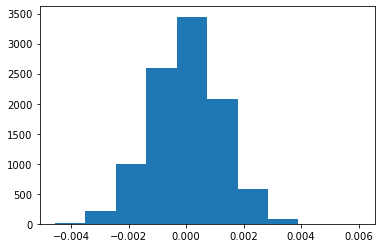

In [26]:
plt.hist(p_diffs)

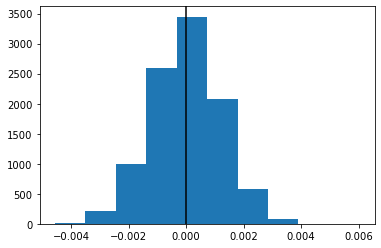

In [27]:
# we simulated a sampling distribution for the conversion difference by bootstrapping
plt.hist(p_diffs);
plt.axvline(x=0, color='black');

# What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [28]:
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
print(act_diff)
p_diffs = np.array(p_diffs)
(act_diff < p_diffs).mean()

-0.0015790565976871451


0.9043

# In words, explain what you just computed above. 

What is this value called in scientific studies? 

What does this value mean in terms of whether or not there is a difference between the new and old pages?

We calculated the p-value. The p-value of 0.9 says that given that the null hypothesis is true, there is 90% probability of observing our conversion difference (or one more extreme in favour of the alternative).
The null therefore cannot be rejected (with a type I error rate of 5% or any other reasonable type I error rate) and we should keep the old page.

We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let n_old and n_new refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm

convert_old = df2.query(" landing_page == 'old_page' and converted == 1").shape[0]
convert_new = df2.query(" landing_page == 'new_page' and converted == 1").shape[0]
n_old = df2[df2['group'] == 'control'].shape[0]
n_new = df2[df2['group'] == 'treatment'].shape[0]
convert_old
#convert_new
#n_old
#n_new

17489

In [30]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score)
print(p_value)

1.3116075339133115
0.905173705140591


 What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages? Do they agree with the findings above 

In [31]:
from scipy.stats import norm
# Tells us how significant our z-score is
print(norm.cdf(z_score))
# for our single-sides test, assumed at 95% confidence level, we calculate: 
critical_value= norm.ppf(1-(0.05))
print(critical_value)



0.905173705140591
1.6448536269514722


Since the z-score of 1.31 less than the critical valuZ-score is a statistic measured in terms of standard deviations from the mean that can be used to calculate p-value and decide on the hypothesis testing conclusions as is shown above.

The p-value means that we have 90% probability to get the observed difference given that the null is true. It is safe to say that we do not have evidence that the new page leads to more conversions and we should stick to the old page.

# Part III - A regression approach

In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.

Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression


The goal is to use statsmodels to fit the regression model you specified above. to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

In [32]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

C:\Users\Dnaaya\AppData\Local\Temp/ipykernel_8332/37183689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1
C:\Users\Dnaaya\AppData\Local\Temp/ipykernel_8332/37183689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


Use statsmodels to import your regression model. Instantiate the model, and fit the model using the two columns you created in above . to predict whether or not an individual converts

In [33]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


Provide the summary of your model below, and use it as necessary to answer the following questions.

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:               8.085e-06
Time:                        10:31:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

Q :What is the p-value associated with ab_page? Why does it differ from the value you found in Part II

The p-value associated with ab_page is 0.19. The null cannot be rejected because 0.19 is above our Type I error threshold of 0.05.
The negative coefficient of ab_page is therefore insignificant, so we cannot say that the new page has any effect on the conversion rate.
The old page should therefore be kept because the new page did not prove to have higher conversions.
This conclusion is the same like in the previous part, however the p-value differs from the value found in Part II due to different hypotheses being tested in the two parts.
In this case, we are doing a two-tailed test, so the alternative is that the new page has a different conversion rate than the old page (in whichever direction). So if the new page actually performs worse than the old page, it would still fit the alternative hypothesis and this is why the p-value decreased (due to our negative observed difference).
This is the case because the null of the logistic regression is that the new page has no impact on conversions, i.e. that the probability of conversion is the same with the old page and the new page. The alternative for this case is that the probabilities are different.
On the other hand, in the previous part we did one-tailed test, in which the alternative was that the new page has higher conversions.    

 Because last one is two sided test and in Part II was one sided test.Here we test for not equal in our hypotheses there was greater than or equal.

                                                 H0 : p_new = p_old
                                                 H1 : p_new != p_old

Q: Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?

Things like which program people applying for or age or gender of user might influence whether or not an individual converts or not to new page.
Trend appears in several different groups of data but disappears or reverses when these groups are combined (Simpson's paradox).

Yes if we add high correlations predictor variables, leading to unreliable and unstable estimates of regression coefficients can affect our model.Every time we include a new predictor variable with no change in sample size we lose a degree of freedom. The result often is that previously significant predictor in the new regression is no long significant at the same probability of a Type 1 error (the significance level).

Q: Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the countries.csv dataset and merge together your datasets on the approporiate rows. Here are the docs for joining tables.

In [35]:
# Read the countries.csv
countries_df = pd.read_csv(r"C:\Users\Dnaaya\Downloads\Analyze_AB_Test_Results-master\Analyze_AB_Test_Results-master\countries.csv")
df3 =countries_df.set_index('user_id').join(df2.set_index('user_id'),how='inner')
df3

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1
...,...,...,...,...,...,...,...
945994,UK,2017-01-03 14:41:21.565258,control,old_page,0,1,0
945996,US,2017-01-09 18:58:19.952277,treatment,new_page,0,1,1
945997,US,2017-01-04 06:56:24.658147,control,old_page,0,1,0


In [36]:
df3['country'].unique()

array(['US', 'UK', 'CA'], dtype=object)

In [37]:
### Create the necessary dummy variables
df3['intercept'] = 1
df3[['CA','US']] = pd.get_dummies(df3['country'])[['CA','US']]
df3

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
945994,UK,2017-01-03 14:41:21.565258,control,old_page,0,1,0,0,0
945996,US,2017-01-09 18:58:19.952277,treatment,new_page,0,1,1,0,1
945997,US,2017-01-04 06:56:24.658147,control,old_page,0,1,0,0,1


Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.

rovide the summary results, and your conclusions based on the results.


In [38]:
mod = sm.Logit(df3['converted'], df3[['intercept','ab_page', 'US', 'CA']])
df3['US_new'] = df3['US'] * df3['ab_page']
df3['CA_new'] = df3['CA'] * df3['ab_page']
mod =sm.Logit(df3['converted'], df3[['intercept','ab_page', 'US', 'CA','US_new','CA_new']])

results = mod.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sun, 10 Apr 2022   Pseudo R-squ.:               3.483e-05
Time:                        10:31:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
US             0.0057      0.019      0.306      0.760      -0.031       0.043
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US_new        -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA_new        -0.0783      0.057     -1.378      0.168      -0.190       0.033
==============================================================================
"""

from above statistics we notice that P_value for old countries is bigger than new ones so so we cannot say that the new page has any effect on the conversion rate

# Conclusions


 We see that these predictors are insignificant (their p-values are high),
 
 we cannot say that solely being from either US or CA (as opposed to UK) has a significant effect on the conversion rate.

We used several ways to test whether the introduction of the new page increases conversions.
The conclusion in all of them is that the new page did not prove to be better than the old page and we do not have the evidence to switch to the new page.

We failed to find a model that would be good at predicting conversions based on the data we have available.